In [2]:
import pandas as pd
heart = pd.read_csv('data/heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
heart['old'] = heart['age'].apply(lambda x: 1 if x>60 else 0)

In [7]:
heart['old'].sum()

79

In [12]:
def pressure(x, y):
    if y == 1:
        if x <= 20:
            return 123
        if x <= 30:
            return 126
        if x <= 40:
            return 129
        if x <= 50:
            return 135
        return 142
    else:
        if x <= 20:
            return 116
        if x <= 30:
            return 120
        if x <= 40:
            return 127
        if x <= 50:
            return 137
        if x <= 60:
            return 144
        return 159

In [17]:
heart['trestbps_mean'] = heart.apply(lambda x: pressure(x['age'],x['sex']), axis=1)

In [20]:
heart['trestbps_mean'][300]

142

In [21]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.260726,141.669967
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.439757,7.437821
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,137.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,142.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000,142.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,159.000000


In [24]:
heart_dummies = pd.get_dummies(heart, columns=['cp','restecg','slope','ca','thal'])

In [26]:
heart_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   thalach        303 non-null    int64  
 6   exang          303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   target         303 non-null    int64  
 9   old            303 non-null    int64  
 10  trestbps_mean  303 non-null    int64  
 11  cp_0           303 non-null    uint8  
 12  cp_1           303 non-null    uint8  
 13  cp_2           303 non-null    uint8  
 14  cp_3           303 non-null    uint8  
 15  restecg_0      303 non-null    uint8  
 16  restecg_1      303 non-null    uint8  
 17  restecg_2      303 non-null    uint8  
 18  slope_0   

In [28]:
# для нормализации, стандартизации
from sklearn import preprocessing

In [29]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(heart_dummies.columns)

# кодируем исходный датасет
heart_dummies_r = r_scaler.fit_transform(heart_dummies)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
heart_dummies_r = pd.DataFrame(heart_dummies_r, columns=col_names)

In [30]:
heart_dummies_r.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,0.081188,0.098646,0.148515,-0.103173,0.326733,0.149752,-0.455446,0.260726,...,0.468647,-0.422442,0.214521,0.125413,0.066007,0.016502,0.006601,0.059406,-0.452145,0.386139
std,0.672748,0.466011,0.876907,0.816232,0.356198,0.704774,0.469794,0.725672,0.498835,0.439757,...,0.499842,0.494765,0.411169,0.331734,0.248704,0.127605,0.081110,0.236774,0.498528,0.487668
min,-1.925926,-1.000000,-1.800000,-1.795276,0.000000,-2.523077,0.000000,-0.500000,-1.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,-0.555556,-1.000000,-0.500000,-0.456693,0.000000,-0.600000,0.000000,-0.500000,-1.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.543307,0.000000,0.400000,1.000000,0.500000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.629630,0.000000,3.500000,5.102362,1.000000,1.507692,1.000000,3.375000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000


<AxesSubplot: >

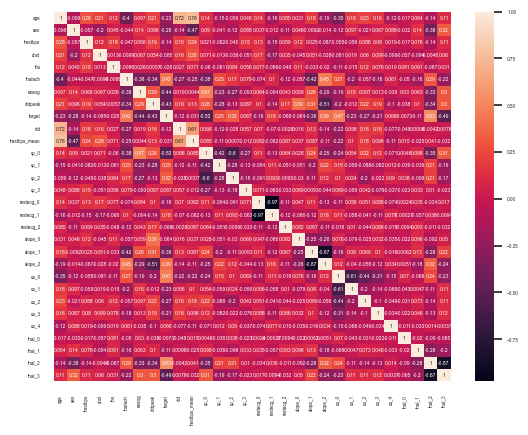

In [42]:
import seaborn as sns # импортируем seaborn для построения графиков
import matplotlib as plt
sns.set(font_scale=0.3)

sns.heatmap(heart_dummies_r.corr(), annot=True) # включаем отображение коэффициентов

In [ ]:
heart_dummies_r[['age', 'old']].corr()

,age,old
age,1.000000,0.718028
old,0.718028,1.000000


In [61]:
heart_dummies_r[['age', 'trestbps_mean']].corr()

,age,trestbps_mean
age,1.000000,0.763055
trestbps_mean,0.763055,1.000000


In [62]:
heart_dummies_r[['thal_2', 'thal_3']].corr()

,thal_2,thal_3
thal_2,1.000000,-0.873032
thal_3,-0.873032,1.000000


In [63]:
heart_dummies_r[['restecg_0', 'restecg_1']].corr()

,restecg_0,restecg_1
restecg_0,1.000000,-0.973934
restecg_1,-0.973934,1.000000


In [64]:
heart_dummies_r[['slope_1', 'slope_2']].corr()

,slope_1,slope_2
slope_1,1.000000,-0.870365
slope_2,-0.870365,1.000000
